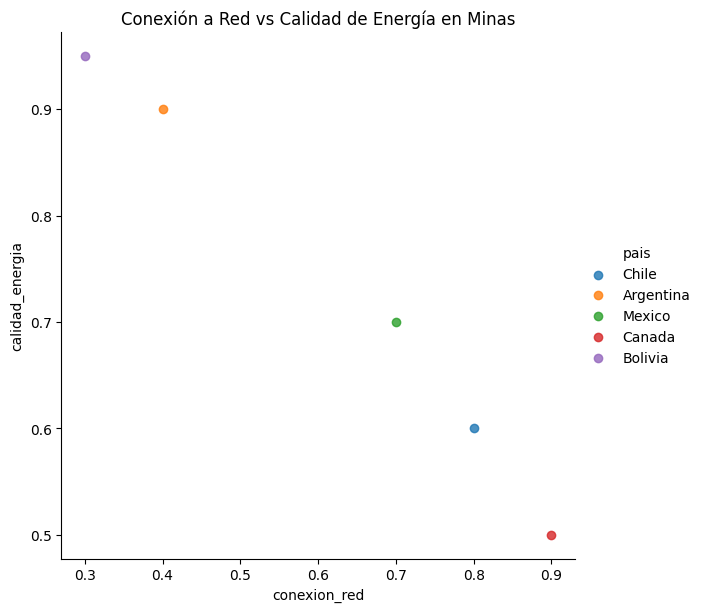

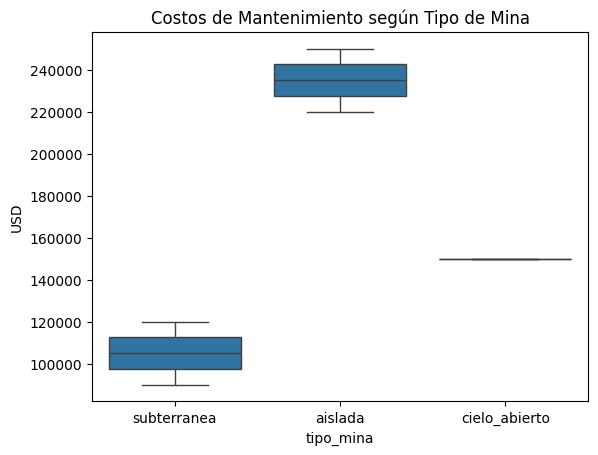

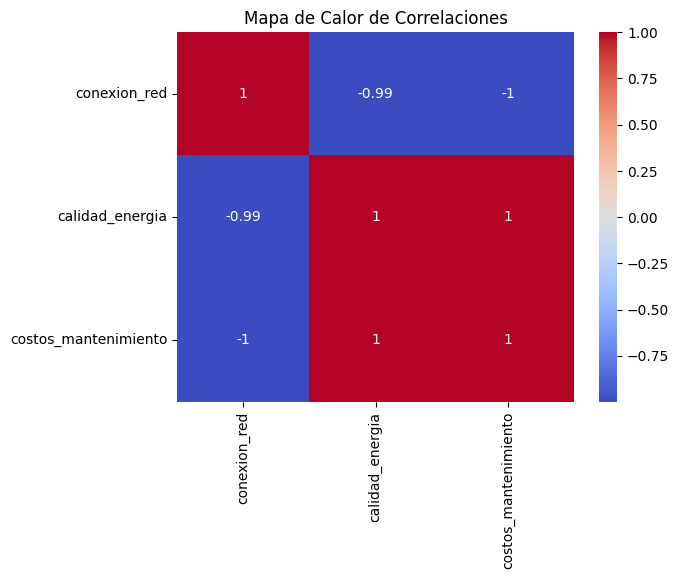

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar datos
df = pd.read_csv('minas_calidad.csv')

# Gráfico de correlación: conexión a red vs calidad de energía
sns.lmplot(data=df, x='conexion_red', y='calidad_energia', hue='pais', height=6)
plt.title('Conexión a Red vs Calidad de Energía en Minas')
plt.show()

# Boxplot de costos de mantenimiento por tipo de mina
sns.boxplot(data=df, x='tipo_mina', y='costos_mantenimiento')
plt.title('Costos de Mantenimiento según Tipo de Mina')
plt.ylabel('USD')
plt.show()

# Mapa de calor de correlaciones
correlation = df[['conexion_red', 'calidad_energia', 'costos_mantenimiento']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones')
plt.show()


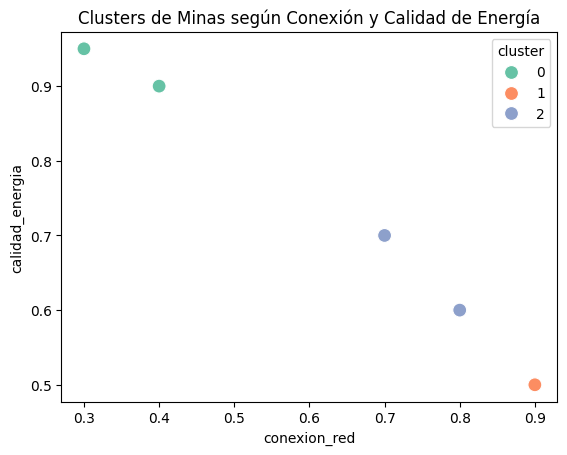

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Normalizar datos
features = df[['conexion_red', 'calidad_energia', 'costos_mantenimiento']]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)

# Aplicar clustering
kmeans = KMeans(n_clusters=3, random_state=42).fit(scaled)
df['cluster'] = kmeans.labels_

# Visualizar clusters
sns.scatterplot(data=df, x='conexion_red', y='calidad_energia', hue='cluster', palette='Set2', s=100)
plt.title('Clusters de Minas según Conexión y Calidad de Energía')
plt.show()


In [ ]:
def calcular_calidad(row):
    voltaje_score = 1 - abs(230 - row['voltaje_rms_L1']) / 20  # ideal: 230V ±10%
    thd_score = max(0, 1 - row['THD (%)'] / 10)  # ideal < 5%
    fp_score = row['FP']  # ideal cerca de 1
    cortes_score = max(0, 1 - row['cortes_mensuales'] / 5)
    tiempo_score = max(0, 1 - row['t_promedio_corte (min)'] / 30)

    # Ponderaciones (puedes ajustarlas)
    return (0.25 * voltaje_score +
            0.2 * thd_score +
            0.2 * fp_score +
            0.2 * cortes_score +
            0.15 * tiempo_score)

# Aplicar sobre DataFrame
df['calidad_energia'] = df.apply(calcular_calidad, axis=1)


NameError: name 'df' is not defined